In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder



In [65]:
df= pd.read_csv("../datasets/CreditCard.csv")
df.head()
df.shape

(1319, 12)

In [66]:
# Descriptive statistics 
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
reports,1319.0,0.456,1.345,0.000,0.000,0.000,0.000,14.000
age,1319.0,33.213,10.143,0.167,25.417,31.250,39.417,83.500
income,1319.0,3.365,1.694,0.210,2.244,2.900,4.000,13.500
share,1319.0,0.069,0.095,0.000,0.002,0.039,0.094,0.906
expenditure,1319.0,185.057,272.219,0.000,4.583,101.298,249.036,3099.505
dependents,1319.0,0.994,1.248,0.000,0.000,1.000,2.000,6.000
months,1319.0,55.268,66.272,0.000,12.000,30.000,72.000,540.000
majorcards,1319.0,0.817,0.387,0.000,1.000,1.000,1.000,1.000
active,1319.0,6.997,6.306,0.000,2.000,6.000,11.000,46.000


### Data Cleaning

In [67]:
# check for null values
df.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

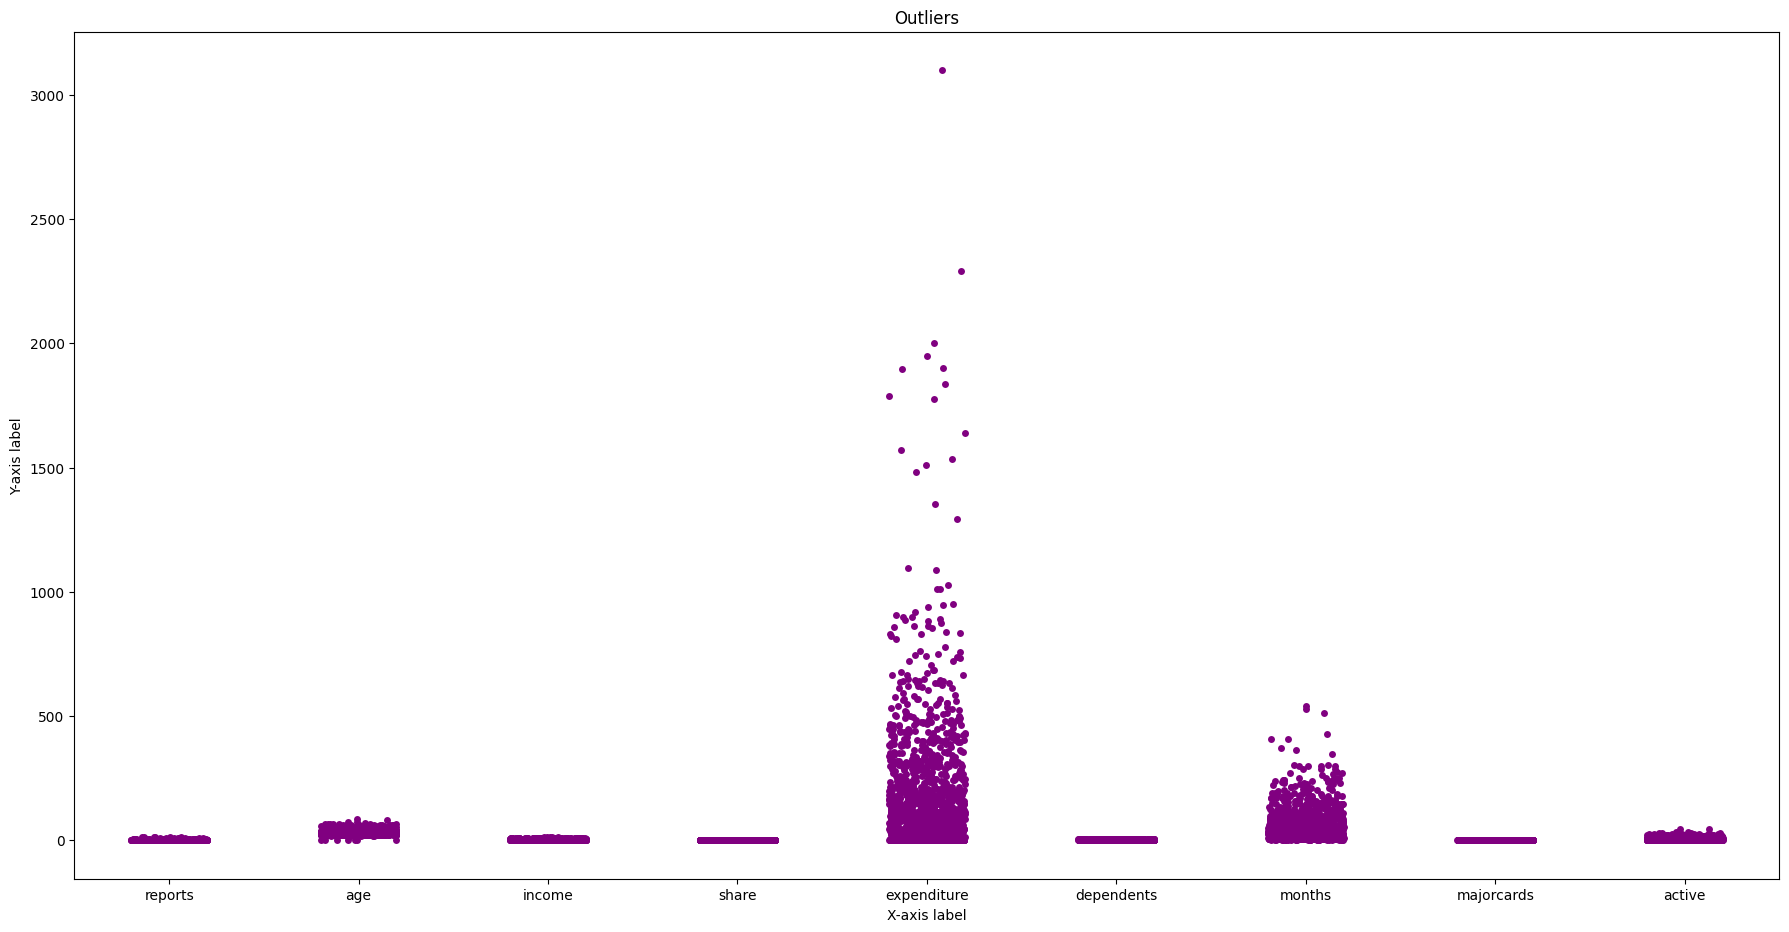

In [68]:
import seaborn as sns
# handling outliers
plt.figure(figsize=(22, 11))

# Add outliers to the plot
sns.stripplot(data=df, color="purple", jitter=0.2, size=5)

# Set the axis labels and title
plt.title("Outliers")
plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")

plt.show()

In [69]:
cat =['card','owner','selfemp']
label = LabelEncoder()
for col in cat:
    df[col] = label.fit_transform(df[col])
# # removing outliers
z_scores = np.abs(stats.zscore(df))
threshold = 3
df = df[(z_scores < threshold).all(axis=1)]


### Preprocessing

In [70]:
target= df['card']
features = df.drop(columns='card')
#scaling features using standard scaling
scale = StandardScaler()
features_scaled = scale.fit_transform(features)
features = pd.DataFrame(features_scaled, columns=features.columns)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


### Model Training

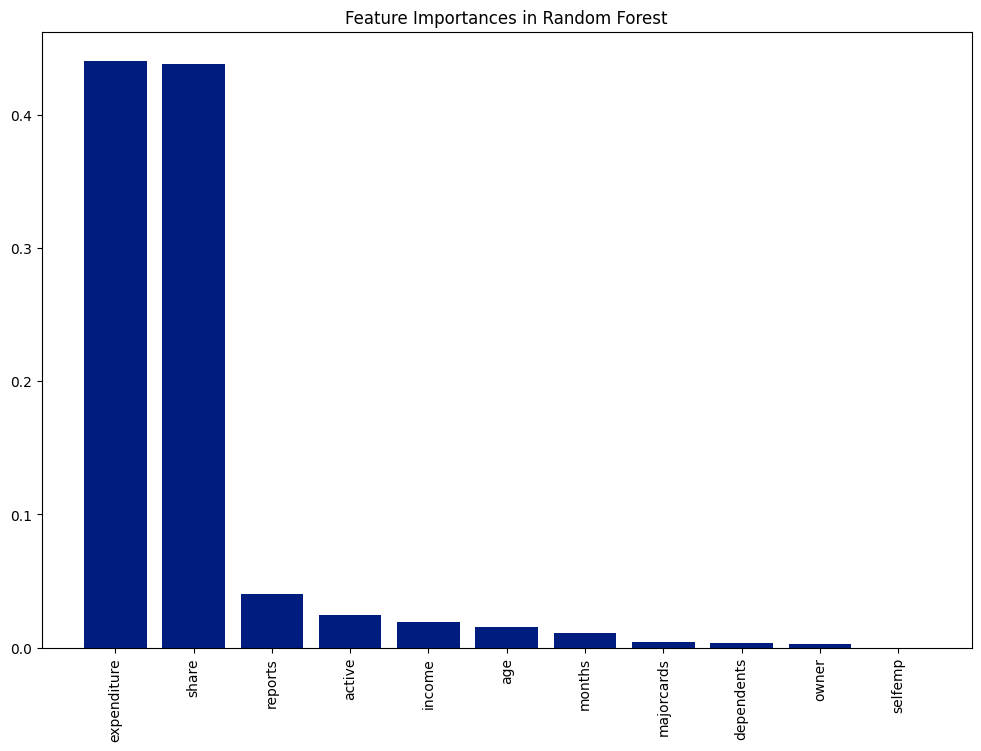

In [71]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Extracting Important Features
importances = model.feature_importances_
feature_names = features.columns
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)
plt.title("Feature Importances in Random Forest")
plt.show()


### Evaluation

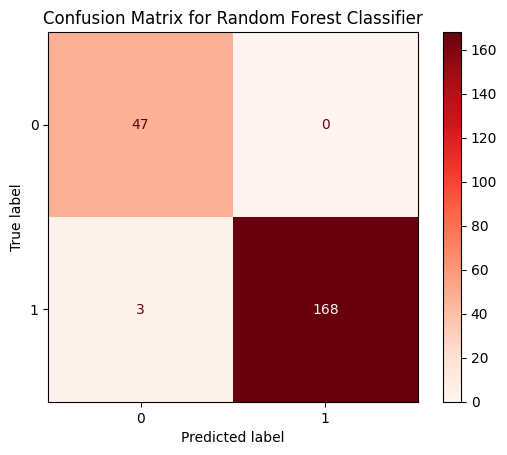

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        47
           1       1.00      0.98      0.99       171

    accuracy                           0.99       218
   macro avg       0.97      0.99      0.98       218
weighted avg       0.99      0.99      0.99       218



In [76]:
ypred = model.predict(X_test)
cnf= confusion_matrix(y_test, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix= cnf, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()
print(classification_report(y_test, ypred, zero_division=0))